In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df=df.drop('CustomerID',axis=1)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
features=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledFeatures=scaler.fit_transform(features)

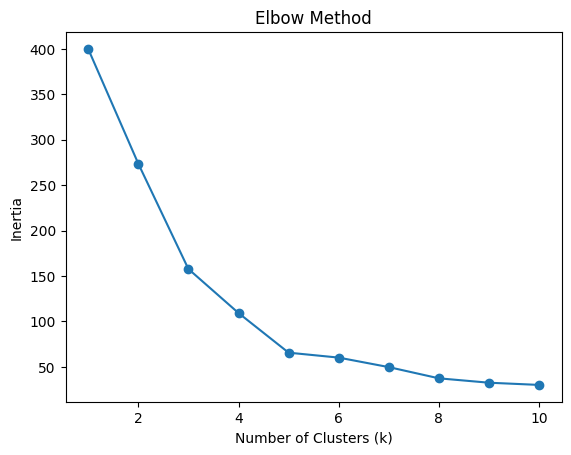

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledFeatures)
    inertia.append(kmeans.inertia_)


plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
optimalK=4
kmeans=KMeans(n_clusters=optimalK,random_state=42)
clusters=kmeans.fit_predict(scaledFeatures)
df['Cluster']=clusters

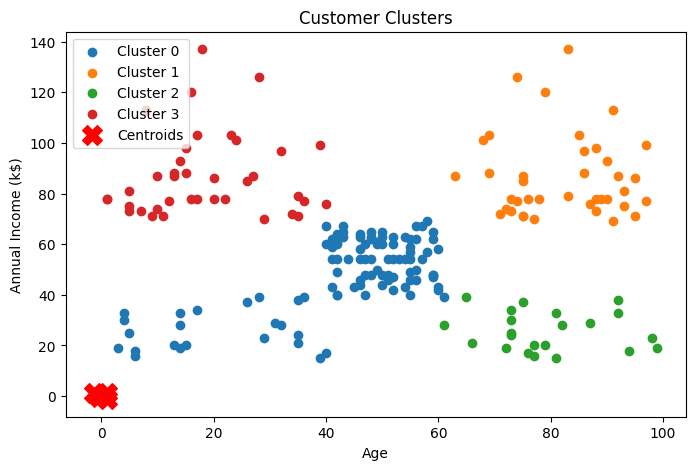

           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.594059  43.603960           48.168317               43.396040   
1        0.538462  32.692308           86.538462               82.128205   
2        0.590909  25.272727           25.727273               79.363636   
3        0.473684  40.394737           87.000000               18.631579   

         Clusters  
Cluster            
0        1.099010  
1        2.538462  
2        2.590909  
3        1.131579  


In [ ]:
plt.figure(figsize=(8, 5))
for cluster in range(optimalK):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Spending Score (1-100)'], cluster_data['Annual Income (k$)'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

print(df.groupby('Cluster').mean())